In [18]:
! pip install word2number

Defaulting to user installation because normal site-packages is not writeable


In [19]:
from word2number import w2n
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [20]:
df = pd.read_csv("hiring.csv")

In [21]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [22]:
m = df["test_score(out of 10)"].mean()
df["test_score(out of 10)"] = df["test_score(out of 10)"].fillna(m)

In [23]:
df.experience.fillna("Zero",inplace=True)
df["experience"] = df["experience"].apply(w2n.word_to_num)

In [24]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.000000,9,50000
1,0,8.000000,6,45000
2,5,6.000000,7,60000
3,2,10.000000,10,65000
4,7,9.000000,6,70000
5,3,7.000000,10,62000
6,10,7.857143,7,72000
7,11,7.000000,8,80000


In [25]:
input_ = df.drop(columns="salary($)")
output_ = df["salary($)"]

In [26]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [27]:
lr.fit(input_,output_)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [28]:
predicted = lr.predict(input_)
predicted

array([52313.61238494, 45722.68644263, 58231.95591138, 63991.7318464 ,
       67429.06277517, 61080.55179794, 75922.72532666, 79307.67351488])

In [29]:
df["predicted"] = predicted
df

,experience,test_score(out of 10),interview_score(out of 10),salary($),predicted
0,0,8.000000,9,50000,52313.612385
1,0,8.000000,6,45000,45722.686443
2,5,6.000000,7,60000,58231.955911
3,2,10.000000,10,65000,63991.731846
4,7,9.000000,6,70000,67429.062775
5,3,7.000000,10,62000,61080.551798
6,10,7.857143,7,72000,75922.725327
7,11,7.000000,8,80000,79307.673515


In [30]:
exp = float(input("Experience : "))
t_score = float(input("Test Score : "))
i_score = float(input("Interview Score : "))

user_pred = lr.predict([[exp, t_score, i_score]])
print("Predict salary $ :", round(user_pred[0], 2))


Experience :  5
Test Score :  6
Interview Score :  5.5


Predict salary $ : 54936.49


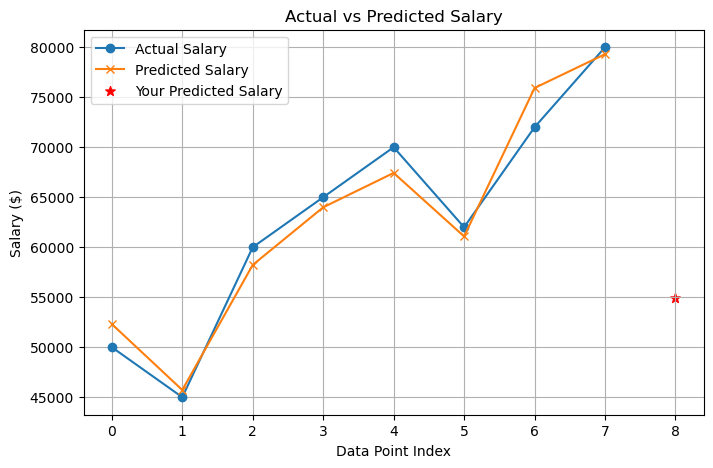

In [31]:
plt.figure(figsize=(8,5))
plt.plot(df.index, output_, label="Actual Salary", marker = "o")
plt.plot(df.index, predicted, label="Predicted Salary", marker="x")

plt.scatter(len(df), user_pred, color="red", label="Your Predicted Salary", s=50, marker="*")

plt.xlabel("Data Point Index")
plt.ylabel("Salary ($)")
plt.title("Actual vs Predicted Salary")
plt.legend()
plt.grid(True)
plt.show()